In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('CC GENERAL.csv')

The goal is to segment customer to define marketing strategy.

The dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [2]:
## Data Exploration 

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We obviously won't need Cust_ID for clustering so we drop it

In [3]:
data.drop('CUST_ID', axis=1, inplace=True)

In [5]:
data.shape

(8950, 17)

There are 17 features to choose which is a lot. Using Heuristics, let's select the two features that
can contribute to our goal of segmenting the customers which are balance and purchases


In [6]:
X = data[['BALANCE', 'PURCHASES']]

In [9]:
# Next we explore and preprocess the features
X.shape

(8950, 2)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BALANCE    8950 non-null   float64
 1   PURCHASES  8950 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [11]:
X.head()

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00


In [16]:
X.isnull().sum()

BALANCE      0
PURCHASES    0
dtype: int64

In [18]:
X.duplicated().sum()

8

In [21]:
X.drop_duplicates(inplace=True)

<ipython-input-21-181ec340d38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates( inplace=True)


There's variance in the features so we scale. Before we scale, let's check how the data distribution of the features

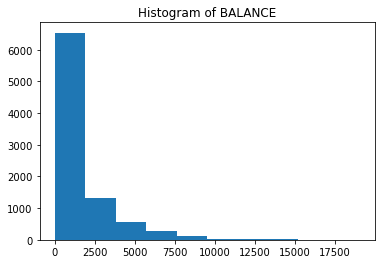

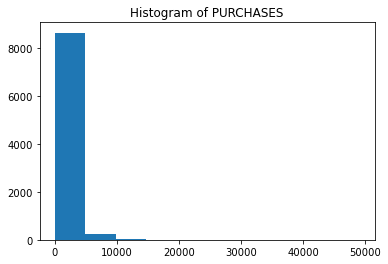

In [26]:
for i in X.columns:
    plt.hist(X[i])
    plt.title(f"Histogram of {i}")
    plt.show()

In [27]:
# scale with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

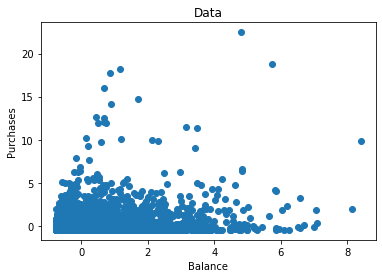

In [29]:
# Let's visualize if there's an existing cluster in the data

plt.scatter(scaled_X[:,0],scaled_X[:,1])
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Data')
plt.show()

<Figure size 1080x576 with 0 Axes>

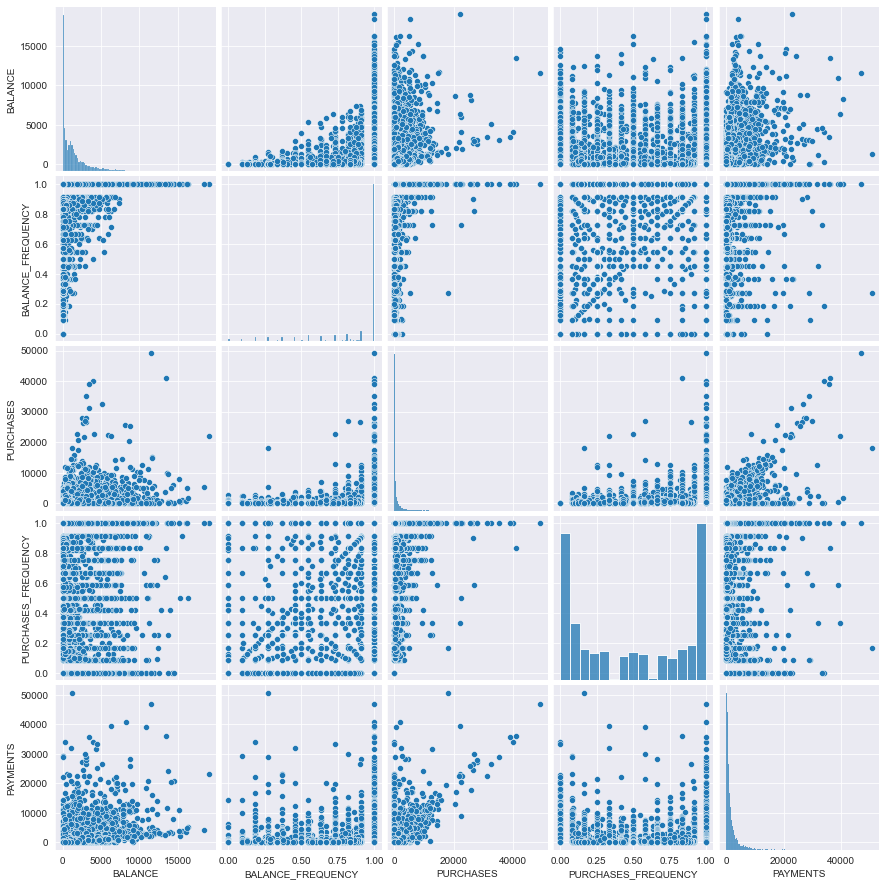

In [45]:
# Let's do a pairplot using seaborn to visualize if we can get distinct groups from the data

import seaborn as sb
sb.set_style('darkgrid')
plt.figure(figsize=(15,8))

cols_to_plot = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','PURCHASES_FREQUENCY', 'PAYMENTS']
sb.pairplot(data[cols_to_plot])

<Figure size 1080x576 with 0 Axes>

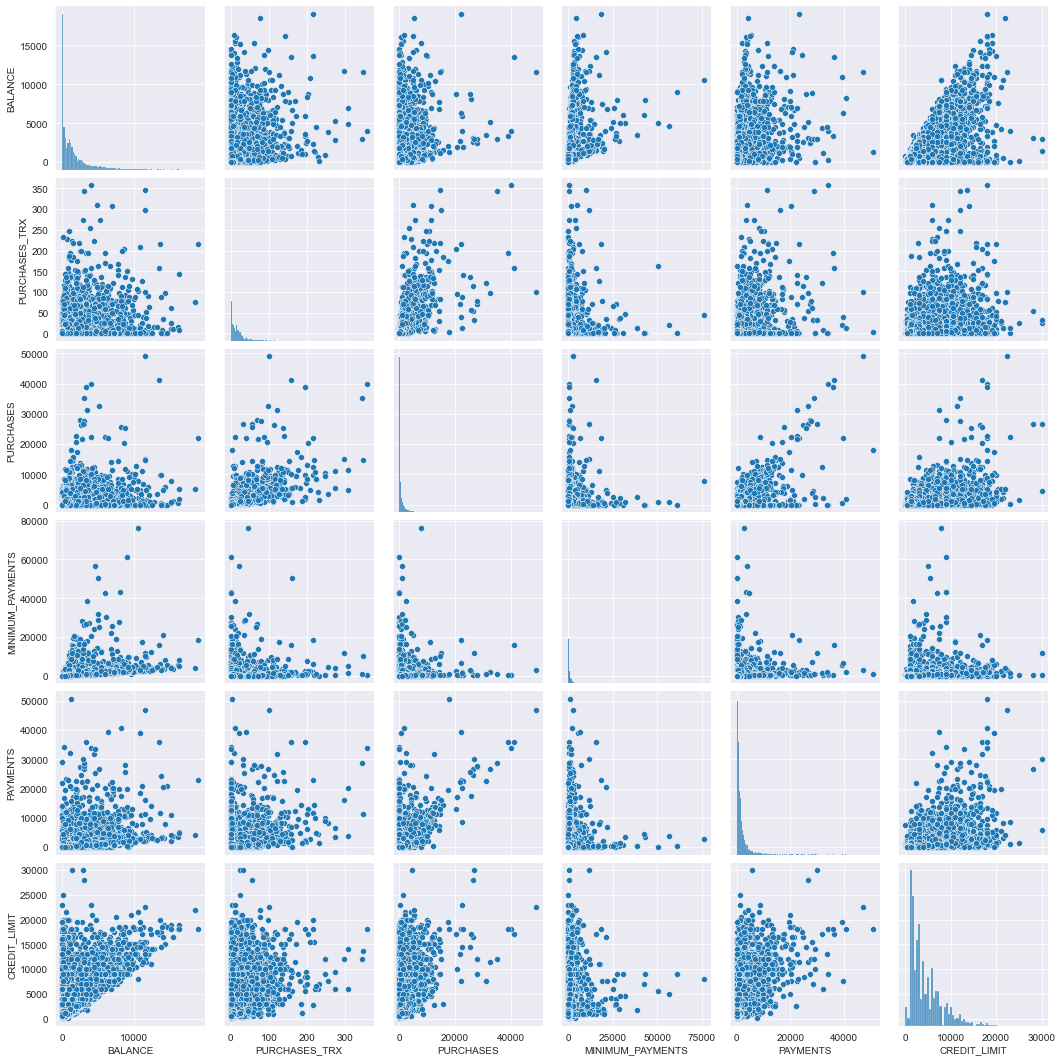

In [47]:
# Let's do a pairplot using seaborn to visualize if we can get distinct groups from the data

import seaborn as sb
sb.set_style('darkgrid')
plt.figure(figsize=(15,8))

cols_to_plot = ['BALANCE', 'PURCHASES_TRX', 'PURCHASES','MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT']
sb.pairplot(data[cols_to_plot])

In [54]:
# From the above, let's select balance and credit limit 
X = data[['BALANCE', 'CREDIT_LIMIT']]

In [55]:
# let's clean and preprocess

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BALANCE       8950 non-null   float64
 1   CREDIT_LIMIT  8949 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [51]:
X.isnull().sum()

BALANCE         0
CREDIT_LIMIT    1
dtype: int64

In [58]:
# let's drop the null value

X.dropna(inplace=True)

<ipython-input-58-46786ef9a4c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [59]:
X.isnull().sum()

BALANCE         0
CREDIT_LIMIT    0
dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Kmeans

There are no distinct groups from the scatter plot but we'd work with it and see what we get.

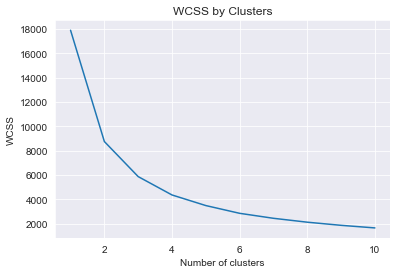

In [61]:
# Since we don't know how many clusters we should use, let's create a series of diff clusters and use
# the elbow mtd

# Create 10 models with 1 to 10 clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(scaled_X)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# There's an elbow at 4 so we use 4 clusters

from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(scaled_X)
# View the cluster assignments
km_clusters

array([1, 2, 2, ..., 1, 1, 1])

In [63]:
scaled_X.shape

(8949, 2)

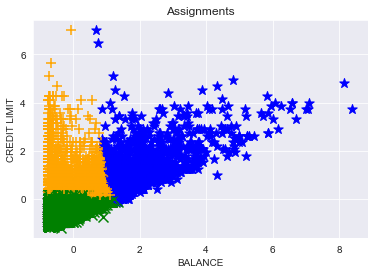

In [68]:
## Let's plot the clusters

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('BALANCE')
    plt.ylabel('CREDIT LIMIT')
    plt.title('Assignments')
    plt.show()

plot_clusters(scaled_X, km_clusters)

From the clusters, we can identify the following groups

- Low balance and low credit limit customers
- Low balance and medium credit limit customers
- medium balance and medium credit limit customers

In [72]:
# verify how good the clustering is using silhouette score

from sklearn.metrics import silhouette_score

print(silhouette_score(scaled_X, km_clusters))

0.5118812243531822


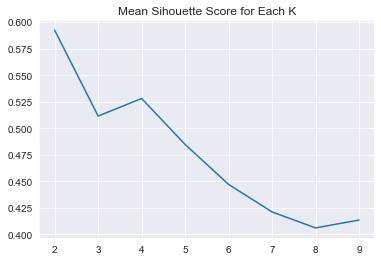

In [74]:
# Let's iterate through diff nos of clusters and check the ss
silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(scaled_X)
    label=model.predict(scaled_X)
    silhouette.append(silhouette_score(scaled_X,label))
    

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()


The silhouette score decreases as we inc

### Agglomerative Clustering

In [65]:


from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(scaled_X)
agg_clusters

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

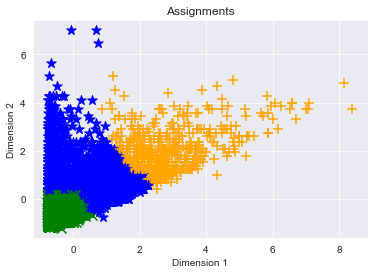

In [66]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Balance')
    plt.ylabel('Credit Limit')
    plt.title('Assignments')
    plt.show()

plot_clusters(scaled_X, agg_clusters)

In [73]:
# verify how good the clustering is using silhouette score

from sklearn.metrics import silhouette_score

print(silhouette_score(scaled_X, agg_clusters))

0.4838929963697348


In [ ]:
# Let's iterate through diff nos of clusters and check the ss
silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(scaled_X)
    label=model.predict(scaled_X)
    silhouette.append(silhouette_score(scaled_X,label))
    

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()

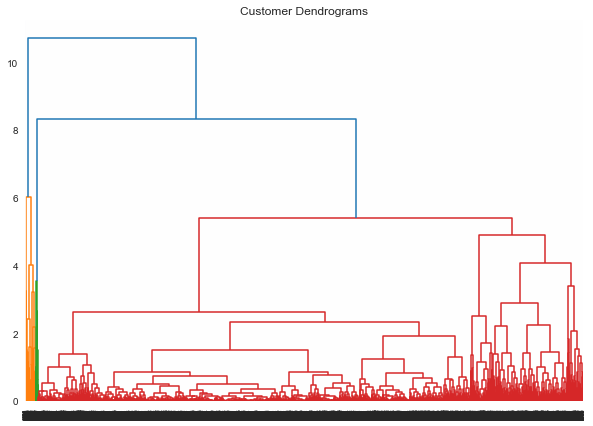

In [67]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(scaled_X, method="complete"))

In [69]:
### The K-means clusetering gave us a better seperation of groups in our data